In [182]:
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from numpy.random import rand, randn

## TASK A: Matrix standardisation function 

In [3]:
def normalise(matrix):
    result = np.zeros(matrix.shape) # careful to make a copy!
    matrix = matrix.astype(float)  # Convert the matrix to float data type
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            result[i, j] = (matrix[i, j] - np.mean(matrix[:, j])) / np.std(matrix[:, j])
    return result

#Vectorized version subtracts vectors from matrices using broadcasting
def normalise_vectorized(matrix):
    column_means = np.mean(matrix, axis=0)
    column_std = np.std(matrix, axis=0)
    standardized_matrix = (matrix - column_means) / column_std
    return standardized_matrix

# Example usage
myMatrix = np.array([[80, 77, 3], [23, 2, 3], [95, 5, 6], [30, 8, 9]])
print(normalise(myMatrix))
print(normalise_vectorized(myMatrix))


[[ 0.74058808  1.7280553  -0.90453403]
 [-1.09478239 -0.67202151 -0.90453403]
 [ 1.22358031 -0.57601843  0.30151134]
 [-0.86938601 -0.48001536  1.50755672]]
[[ 0.74058808  1.7280553  -0.90453403]
 [-1.09478239 -0.67202151 -0.90453403]
 [ 1.22358031 -0.57601843  0.30151134]
 [-0.86938601 -0.48001536  1.50755672]]


## Task B: Eucliden Distance function

In [4]:
myMatrixA = np.array([[1,2],[3,4],[5,6]])
myMatrixB = np.array([[2,3],[5,4],[9,6],[20,21]])

#Euclidean Distance
def euclideanDistance(matrixA, matrixB):
    distance = np.zeros((matrixA.shape[0], matrixB.shape[0]))
    for i in range(matrixA.shape[0]):
        for j in range(matrixB.shape[0]):
            distance[i,j] = np.sqrt(np.sum(np.square(matrixA[i] - matrixB[j])))
    return distance

euclideanDistance(myMatrixA, myMatrixB)

array([[ 1.41421356,  4.47213595,  8.94427191, 26.87005769],
       [ 1.41421356,  2.        ,  6.32455532, 24.04163056],
       [ 4.24264069,  2.        ,  4.        , 21.21320344]])

## Task C: Likelihood of a data sample under a Gaussian model

Here we assume having a 2 Bi-variate Gaussian Models, Model 0 and Model 1. We will sample 100 data points and assign them to either of the two models using the pdf of the multivariate Gaussian distribution.

\begin{equation}
\begin{split}
\mathcal{N}  (x_i|\mu_k, \Sigma_k) = \frac{1}{(2\pi)^{(d/2)} |\Sigma_k|^{1/2}} \exp \left\{- \frac{1}{2} \left(x_i-\mu_k\right)^{'} \Sigma_k^{-1} \left(x_i-\mu_k \right)  \right\}
\end{split}    
\end{equation}

In [186]:
def multivariate_normal_pdf(mu,sigma,x):
    return 1 / (2 * np.pi)**(len(mu)/2) * 1 / np.sqrt(np.linalg.det(sigma)) * np.exp(
        -1/2 * np.dot(np.dot((x - mu).T, np.linalg.inv(sigma)), (x - mu)))


n, d, k = 100, 2, 2
np.random.seed(20)
X = rand(n, d) # This is the data matrix consisting of 100 samples of a bivariate standard normal distribution


#We make the means not to far from our sampled data points:
model_1_mu = rand(d) * 0.5 + 0.5
model_2_mu = - rand(d) * 0.5 + 0.5

model_1_sigma = [np.diag(rand(d))]*2
model_2_sigma = [np.diag(rand(d))]*2



#Alternative Representation
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]

S = np.diag(rand(d))
sigmas = [S]*k # This is the sigma of the first model and the second model

result = np.array([])
for i in range(n):
    result = np.append(result, 0 if multivariate_normal_pdf(means[0], sigmas[0], X[i])>multivariate_normal_pdf(means[1], sigmas[1], X[i] ) else 1)


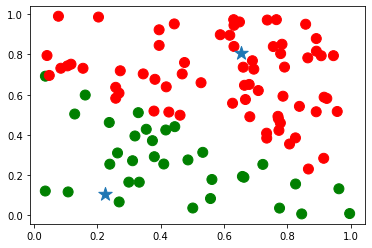

In [185]:

colors = np.array(['red', 'green'])[result.astype(int)]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()
